            Adj_Close     Close      High       Low      Open     Volume
Date                                                                    
1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600
          Adj_Close         Close          High           Low          Open  \
count  11107.000000  11107.000000  11107.000000  11107.000000  11107.000000   
mean      23.522229     24.357607     24.598169     24.092608     24.339076   
std       49.767881     50.217498     50.691902     49.682631     50.166818   
min        0.037815      0.049107      0.049665      0.049107      0.049665   
25%        0.243402      0.300290      0.306362      0.292411      0.300090   
50%        0.44

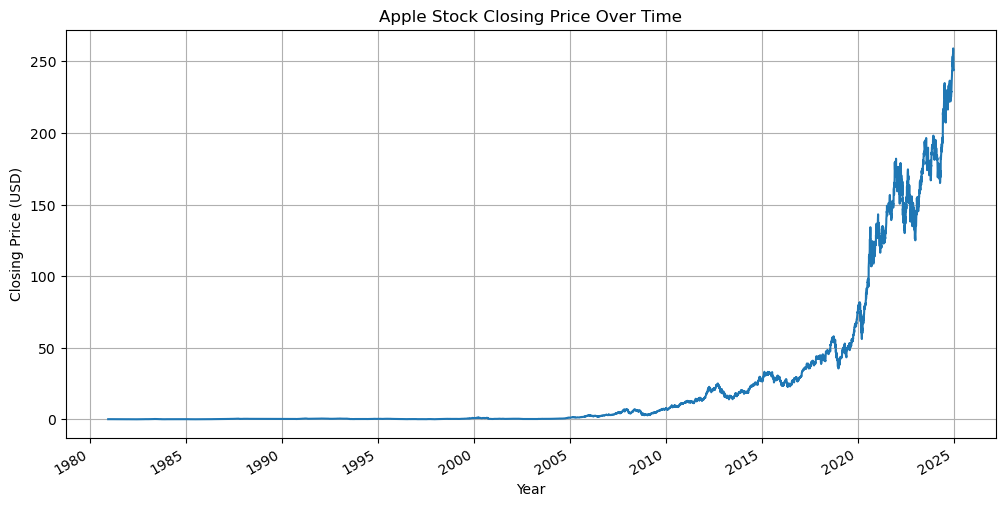

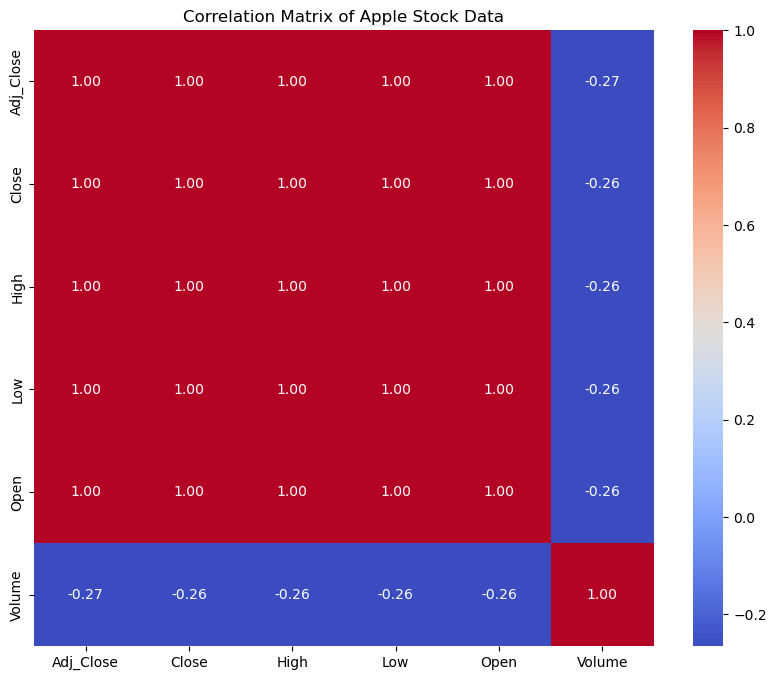

Root Mean Squared Error (RMSE): 0.98
Mean Absolute Error (MAE): 0.33
R2 Score: 1.00


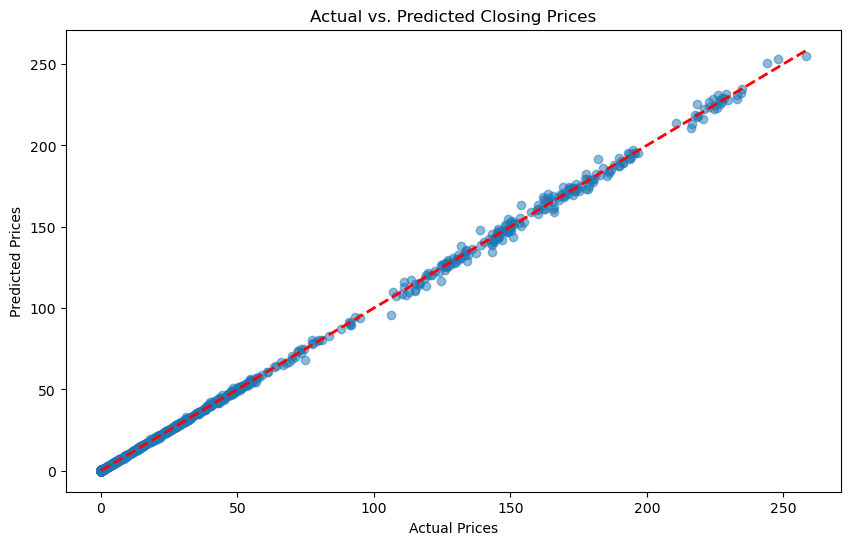

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

df = pd.read_csv('apple_stock.csv')
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
df['Date'] = pd.to_datetime(df.iloc[:, 0])
df = df.set_index('Date')
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
#performing eda
print(df.head())
print(df.describe())
#plotting graphs
plt.figure(figsize=(12, 6))
df['Close'].plot()
plt.title('Apple Stock Closing Price Over Time')
plt.ylabel('Closing Price (USD)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Apple Stock Data')
plt.show()

df['Prev_Open'] = df['Open'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)
df['Day_of_Week'] = df.index.day_name()

df.dropna(inplace=True)
#preprocessing the data
X = df[['Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume', 'Day_of_Week']]
y = df['Close']

numerical_features = ['Prev_Open', 'Prev_High', 'Prev_Low', 'Prev_Volume']
categorical_features = ['Day_of_Week']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#using a pipeline to run the program in an organised manner
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])
#performing traintestsplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)
#predicting the value for testing data
y_pred = model_pipeline.predict(X_test)
#calculating the metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.2f}")
#final comparison between actual and predicted closing prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

